In [1]:
import numpy as np
import pandas as pd

In [2]:
# pull up the polyfit variables and x, y positions

p_fit = np.load('./dataFolder/3DpolyfitVariables.npy') #load the coefficients of the polyfit
X_arr = pd.read_csv('./dataFolder/x_proboscis_ordered')
X_arr = X_arr.drop(['Unnamed: 0'], axis=1)
Y_arr = pd.read_csv('./dataFolder/y_proboscis_ordered')
Y_arr = Y_arr.drop(['Unnamed: 0'], axis=1)

In [3]:
len(p_fit), len(X_arr)

(1000, 1000)

In [4]:
Y_arr.head()

,prob_base_Y,prob_1_Y,prob_2_Y,prob_3_Y,prob_4_Y,prob_5_Y,prob_mid_Y
0,323.795071,314.190856,307.238159,300.212757,293.442655,287.157793,277.537139
1,327.728714,320.557345,310.449771,302.621466,295.597465,288.594333,278.019424
2,321.217857,315.709023,309.847593,301.216386,295.238330,286.080388,278.000000
3,323.250858,314.914284,309.245416,301.216386,295.597465,287.696495,278.019424
4,316.354012,312.985141,306.635981,300.614209,294.699627,287.157793,278.000000


### compute error angle

In [5]:
trackPoints = pd.read_csv('./dataFolder/MV_m1_points.csv')
trackPoints.head()

,body_X,body_Y,nectary_X,nectary_Y,prob_base_X,prob_base_Y,prob_mid_X,prob_mid_Y,prob_1_X,prob_1_Y,prob_2_X,prob_2_Y,prob_3_X,prob_3_Y,prob_4_X,prob_4_Y,prob_5_X,prob_5_Y
0,388.078376,381.614068,372.227746,188.424715,381.619192,323.795071,380.238266,277.537139,381.059690,314.190856,381.198874,307.238159,381.084916,300.212757,380.799242,293.442655,380.405303,287.157793
1,386.810000,386.980000,372.970000,188.000000,381.348241,327.728714,379.416841,278.019424,380.405303,320.557345,380.743042,310.449771,380.743042,302.621466,380.306818,295.597465,380.208333,288.594333
2,383.100000,379.100000,373.950000,188.010000,378.548415,321.217857,379.950000,278.000000,378.337121,315.709023,378.463881,309.847593,378.691797,301.216386,379.125000,295.238330,379.223485,286.080388
3,379.238602,381.156274,374.930000,188.010000,377.155303,323.250858,376.815665,278.019424,377.226377,314.914284,378.008049,309.245416,377.096385,301.216386,377.253788,295.597465,376.859848,287.696495
4,378.700000,379.270000,374.940000,188.010000,376.495312,316.354012,377.010000,278.000000,377.363281,312.985141,376.640553,306.635981,376.754511,300.614209,376.465909,294.699627,376.958333,287.157793


In [6]:
body =  trackPoints.loc[:, ['body_X', 'body_Y']].values
prob_base = trackPoints.loc[:, ['prob_base_X', 'prob_base_Y']].values

BodyHeadVector = prob_base - body

### Method Ia - get the slope, compute the tangent at the base

In [7]:
# compute the tangent at the curve at point x,y
def getTangentCurve(x,y,p):
    fittedParameters = np.poly1d(p)
    deriv = np.polyder(fittedParameters) # this is the derivative of the initial fit polynomial, the derivative at point 0 will be the slope of the tangent
    pointVal = y[0] #evaluate the tangent at the base of the proboscis
    
    #create the tangent line
    line_y = [pointVal - 2, pointVal, pointVal + 2] #used 2 pixels beofre and the base to create a line
    line_x = np.polyval(np.poly1d(deriv), line_y)
    #line_x = np.polyval(fittedParameters, line_y)
    return(line_x, line_y)

In [8]:
def MakeFigureForFit(x, y, p, ax, x_tang, y_tang):
    fittedParameters = np.poly1d(p)
    ax.plot(x, y, '.b', fittedParameters(y),y,'-k')
    ax.plot(x_tang, y_tang, '-r')
    ax.set_xlim([x.min()-10,x.max() + 10])
    ax.set_ylim([y.min() -10, y.max() + 10])
    return()

In [10]:
# save images in folder

folder = './dataFolder/errorSignal/polyFitMethod3/'

In [15]:
line_y = [y[0] - 10, y[0], y[0] + 10]
line_x = np.polyval(np.polyder(np.poly1d(p)), line_y)

In [16]:
line_x + x[0]

array([331.67015169, 331.62218319, 331.56473078])

()

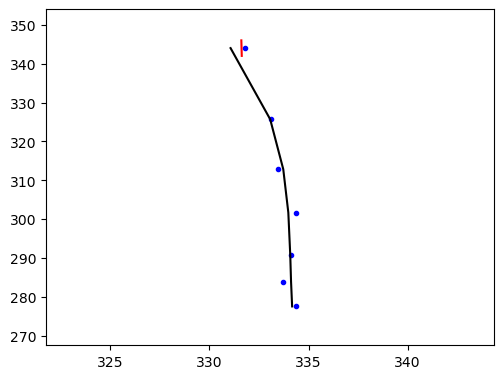

In [17]:
f = plt.figure()
ax = f.add_axes([0.3, 0.3, 0.7, 0.7])
MakeFigureForFit(x,y,p,ax, x_tang + x[0], y_tang)

In [14]:
y[0] = y[0] + 5
y

array([344.028572, 325.704927, 312.858479, 301.694348, 290.749142,
       283.925578, 277.537139])

KeyboardInterrupt: 

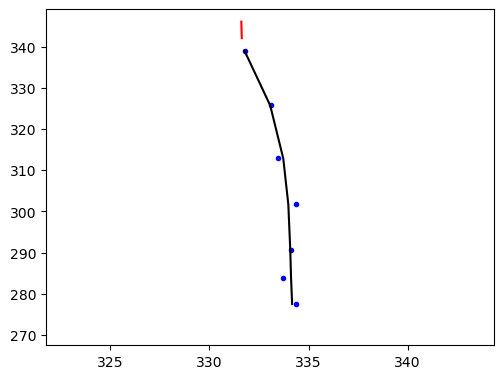

In [12]:
# plot this tangent at the curve
import matplotlib.pyplot as plt
f = plt.figure()
ax = f.add_axes([0.3, 0.3, 0.7, 0.7])

for ii, p in enumerate(p_fit):
    x = X_arr.loc[ii,:].values
    y = Y_arr.loc[ii,:].values
    x_tang, y_tang = getTangentCurve(x,y+5,p)
    
    MakeFigureForFit(x,y,p,ax, x_tang + x[0], y_tang)
    figname = str(ii).zfill(4) + '.png'
    plt.savefig(folder + figname)

    plt.cla()

In [ ]:
# export the tangent line for plotting on figure

def getTangentCurveForFigure(x,y,p):
    fittedParameters = np.poly1d(p)
    deriv = np.polyder(fittedParameters)
    pointVal = y[0]
    #create the tangent line
    line_y = [pointVal - 20, pointVal]
    line_x = np.polyval(fittedParameters, line_y)
    return(line_x, line_y)


tangent_x = []
tangent_y = []

for ii, p in enumerate(p_fit):
    x = X_arr.loc[ii,:].values
    y = Y_arr.loc[ii,:].values
    x_tang, y_tang = getTangentCurveForFigure(x,y,p)
    tangent_x.append(x_tang)
    tangent_y.append(y_tang)

path = './dataFolder/errorSignal/'
np.save(path + 'tangent_x.npy', tangent_x)
np.save(path + 'tangent_y.npy', tangent_y)

In [ ]:
fitLine = []
for ii, p in enumerate(p_fit):
    x = X_arr.loc[ii,:].values
    y = Y_arr.loc[ii,:].values
    x_tang, y_tang = getTangentCurve(x,y,p)
    firLine = [x_tang[1]-x_tang[0], y_tang[0]
    Tangent.append(tangent_pt)

Tangent = np.array(Tangent)
probVector = Tangent - prob_base

In [ ]:
angle = []
for ii, pvec in enumerate(probVector):
    aa = np.arctan2(np.cross(pvec, BodyHeadVector[ii]), np.dot(pvec, BodyHeadVector[ii]))
    angle.append(aa)
    
pd.Series(data = angle).to_csv('./dataFolder/errorSignal/Polyfit_errorAngle.csv')

### Method Ib - get the line joining the first two points computed by the slope

In [ ]:
# compute the tangent at the curve at point x,y
def evaluteCurveAtY(x,y,p):
    fittedParameters = np.poly1d(p)
    deriv = np.polyder(fittedParameters)
    pointVal0 = y[0]
    pointVal1 = y[1]
    #create the tangent line
    line_y = [pointVal0, pointVal1]
    line_x = np.polyval(fittedParameters, line_y)
    return(line_x, line_y)

In [ ]:
x_line = []
y_line = []
for ii, p in enumerate(p_fit):
    x = X_arr.loc[ii,:].values
    y = Y_arr.loc[ii,:].values
    x_, y_ = evaluteCurveAtY(x,y,p)
    x_line.append(x_[1] - x_[0])
    y_line.append(y_[1] - y_[0])

probVector = np.transpose([x_line, y_line])

In [ ]:
angle = []
for ii, pvec in enumerate(probVector):
    aa = np.arctan2(np.cross(pvec, BodyHeadVector[ii]), np.dot(pvec, BodyHeadVector[ii]))
    angle.append(aa)
    
pd.Series(data = angle).to_csv('./dataFolder/errorSignal/CurvePoints_errorAngle.csv')

In [ ]:
plt.plot(np.array(angle)*180/np.pi)

### Method II - get the line joiinig the first two digitized points

In [ ]:
prob_2ndPoint = trackPoints.loc[:, ['prob_1_X', 'prob_1_Y']].values
probVector = prob_2ndPoint - prob_base

In [ ]:
angle = []
for ii, pvec in enumerate(probVector):
    aa = np.arctan2(np.cross(pvec, BodyHeadVector[ii]), np.dot(pvec, BodyHeadVector[ii]))
    angle.append(aa)
    
pd.Series(data = angle).to_csv('./dataFolder/errorSignal/Digitized_errorAngle.csv')

In [ ]:
plt.plot(np.array(angle)*180/np.pi)